# Introduction

## Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
import os

paths = ['./omicron/src/preprocessing/', './omicron/src/validation/', './omicron/src/classificators/']
for path in paths:
    sys.path.append(os.path.abspath(path))

from preproc import *
from CV import *

## Loading dataset

Preporcessing script performs csv file loading, removing unwanted columns and filling NaNs with given value

In [3]:
df_phen, df_xp = read_dfs(nan_fill=0)

In [4]:
print(df_xp.shape)
print(df_phen.shape)

(54, 34476)
(54, 203)


In [7]:
df_phen[['"tau_DayDBP"', '"tau_NightSBP"']]

,"""tau_DayDBP""","""tau_NightSBP"""
0,0.108125,0.059130
1,0.132000,0.077021
2,0.129146,0.080000
3,0.098706,0.090000
4,0.131250,0.033920
5,0.082963,0.082358
6,0.160533,0.121515
7,0.096154,0.065189
8,0.112048,0.081287
9,0.101474,0.066612


## Performing recon data vizualization

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib

In [9]:
pca = PCA(n_components=20)
components = pca.fit_transform(df_xp)

In [13]:
tsne = TSNE(n_components=2, perplexity=15.0, method='barnes_hut')
components = tsne.fit_transform(components)
components_dataframe = pd.DataFrame(data=components)

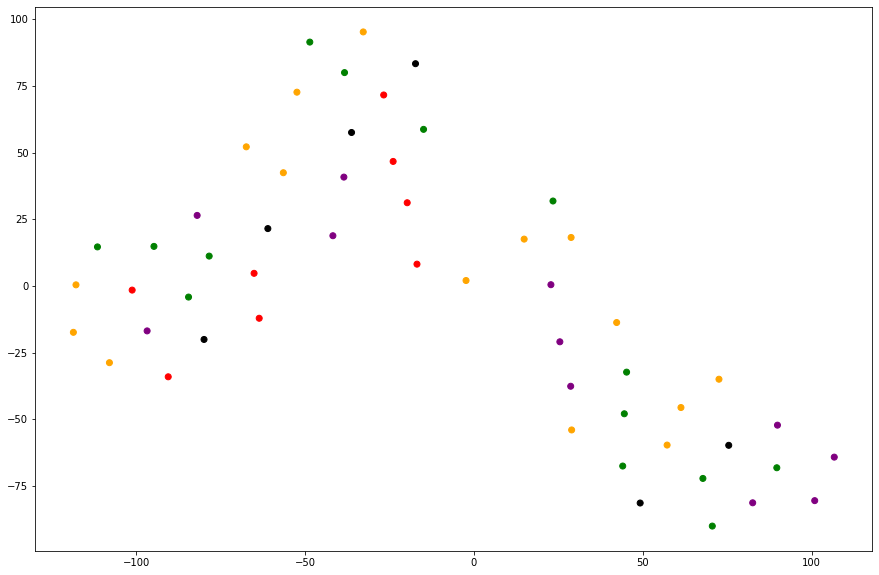

In [14]:
x = components_dataframe[0]
y = components_dataframe[1]
label = df_phen[' "grupa"']
colors = ['red','green','blue','purple', 'black', 'orange']
plt.figure(figsize=(15,10))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

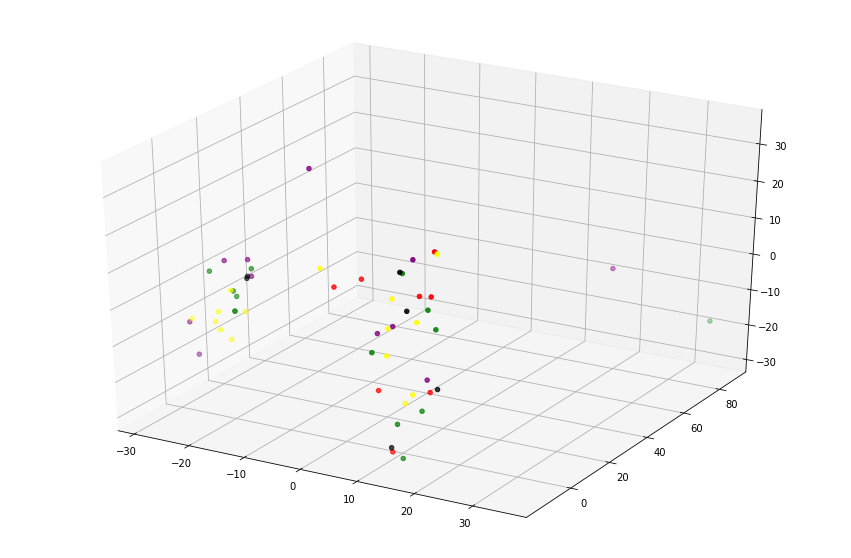

In [15]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
components = pca.fit_transform(df_xp)
components_dataframe = pd.DataFrame(data=components)
x = components_dataframe[0]
y = components_dataframe[1]
z = components_dataframe[2]
label = df_phen[' "grupa"']
colors = ['red','green','blue','purple', 'black', 'yellow']

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=label, cmap=matplotlib.colors.ListedColormap(colors))
